<a href="https://colab.research.google.com/github/Dreamki503/ProdigyInfoTech/blob/main/Drug/Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating a decision tree classifier to precict the class of unknown patient and to predict which drug to administer**

In [1]:
from google.colab import files
files.upload()

Saving drug200.csv to drug200.csv


{'drug200.csv': b'Age,Sex,BP,Cholesterol,Na_to_K,Drug\n23,F,HIGH,HIGH,25.355,drugY\n47,M,LOW,HIGH,13.093,drugC\n47,M,LOW,HIGH,10.114,drugC\n28,F,NORMAL,HIGH,7.798,drugX\n61,F,LOW,HIGH,18.043,drugY\n22,F,NORMAL,HIGH,8.607,drugX\n49,F,NORMAL,HIGH,16.275,drugY\n41,M,LOW,HIGH,11.037,drugC\n60,M,NORMAL,HIGH,15.171,drugY\n43,M,LOW,NORMAL,19.368,drugY\n47,F,LOW,HIGH,11.767,drugC\n34,F,HIGH,NORMAL,19.199,drugY\n43,M,LOW,HIGH,15.376,drugY\n74,F,LOW,HIGH,20.942,drugY\n50,F,NORMAL,HIGH,12.703,drugX\n16,F,HIGH,NORMAL,15.516,drugY\n69,M,LOW,NORMAL,11.455,drugX\n43,M,HIGH,HIGH,13.972,drugA\n23,M,LOW,HIGH,7.298,drugC\n32,F,HIGH,NORMAL,25.974,drugY\n57,M,LOW,NORMAL,19.128,drugY\n63,M,NORMAL,HIGH,25.917,drugY\n47,M,LOW,NORMAL,30.568,drugY\n48,F,LOW,HIGH,15.036,drugY\n33,F,LOW,HIGH,33.486,drugY\n28,F,HIGH,NORMAL,18.809,drugY\n31,M,HIGH,HIGH,30.366,drugY\n49,F,NORMAL,NORMAL,9.381,drugX\n39,F,LOW,NORMAL,22.697,drugY\n45,M,LOW,HIGH,17.951,drugY\n18,F,NORMAL,NORMAL,8.75,drugX\n74,M,HIGH,HIGH,9.567,drugB\n49

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.duplicated().sum()

0

<Axes: >

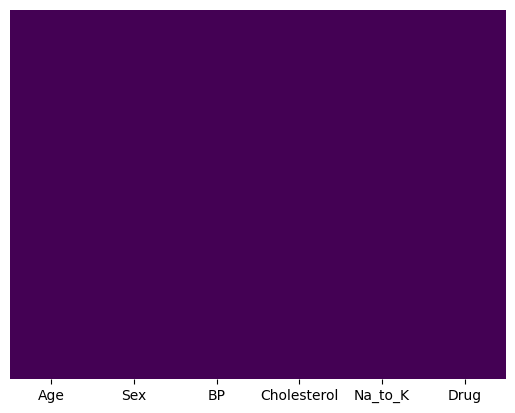

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

<Axes: xlabel='Drug', ylabel='count'>

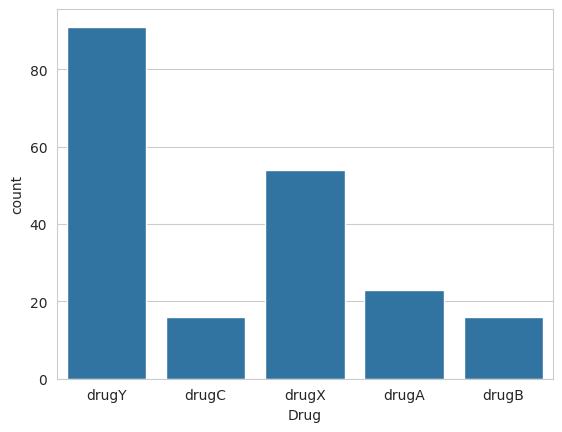

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Drug", data = df)

<Axes: xlabel='Sex', ylabel='count'>

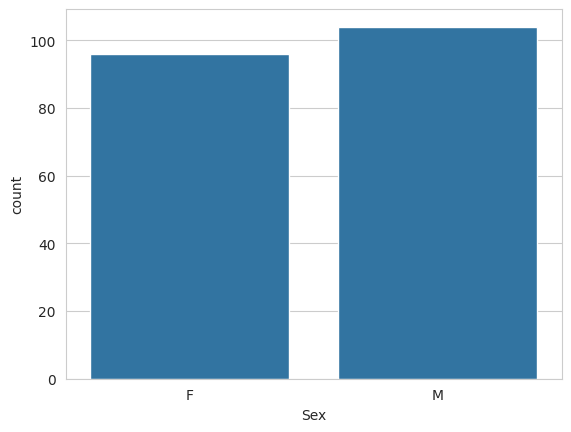

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = "Sex", data = df)

<Axes: xlabel='Sex', ylabel='count'>

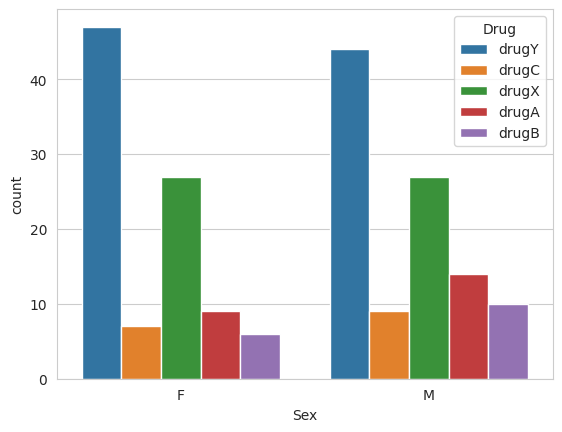

In [12]:
sns.set_style("whitegrid")
sns.countplot(x = "Sex",hue = "Drug", data = df)

In [14]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [19]:
BP = pd.get_dummies(df["BP"], dtype = int)
sex = pd.get_dummies(df["Sex"], dtype = int)
Cholesterol = pd.get_dummies(df["Cholesterol"], dtype = int)
x_other = df.drop(["BP","Sex","Cholesterol","Drug"],axis = 1)

In [20]:
x = pd.concat([BP,sex,Cholesterol,x_other],axis = 1).values
y = pd.get_dummies(df["Drug"],dtype = int).values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
prediction = dtree.predict(x_test)
print(classification_report(y_test,prediction))
accuracy = accuracy_score(y_test,prediction)
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
 samples avg       1.00      1.00      1.00        40

1.0


[Text(0.6666666666666666, 0.9, 'x[8] <= 14.839\ngini = 0.277\nsamples = 160\nvalue = [[141, 19]\n[146, 14]\n[148, 12]\n[119, 41]\n[86, 74]]'),
 Text(0.5555555555555556, 0.7, 'x[0] <= 0.5\ngini = 0.271\nsamples = 86\nvalue = [[67, 19]\n[72, 14]\n[74, 12]\n[45, 41]\n[86, 0]]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 0.5\ngini = 0.14\nsamples = 53\nvalue = [[53, 0]\n[53, 0]\n[41, 12]\n[12, 41]\n[53, 0]]'),
 Text(0.2222222222222222, 0.3, 'x[6] <= 0.5\ngini = 0.199\nsamples = 26\nvalue = [[26, 0]\n[26, 0]\n[14, 12]\n[12, 14]\n[26, 0]]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[14, 0]\n[14, 0]\n[0, 14]\n[14, 0]]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [[27, 0]\n[27, 0]\n[27, 0]\n[0, 27]\n[27, 0]]'),
 Text(0.7777777777777778, 0.5, 'x[7] <= 50.0\ngini = 0.195\nsamples = 33\nvalue = [[14, 19]\n[19, 14]\n[33, 0]\n[33

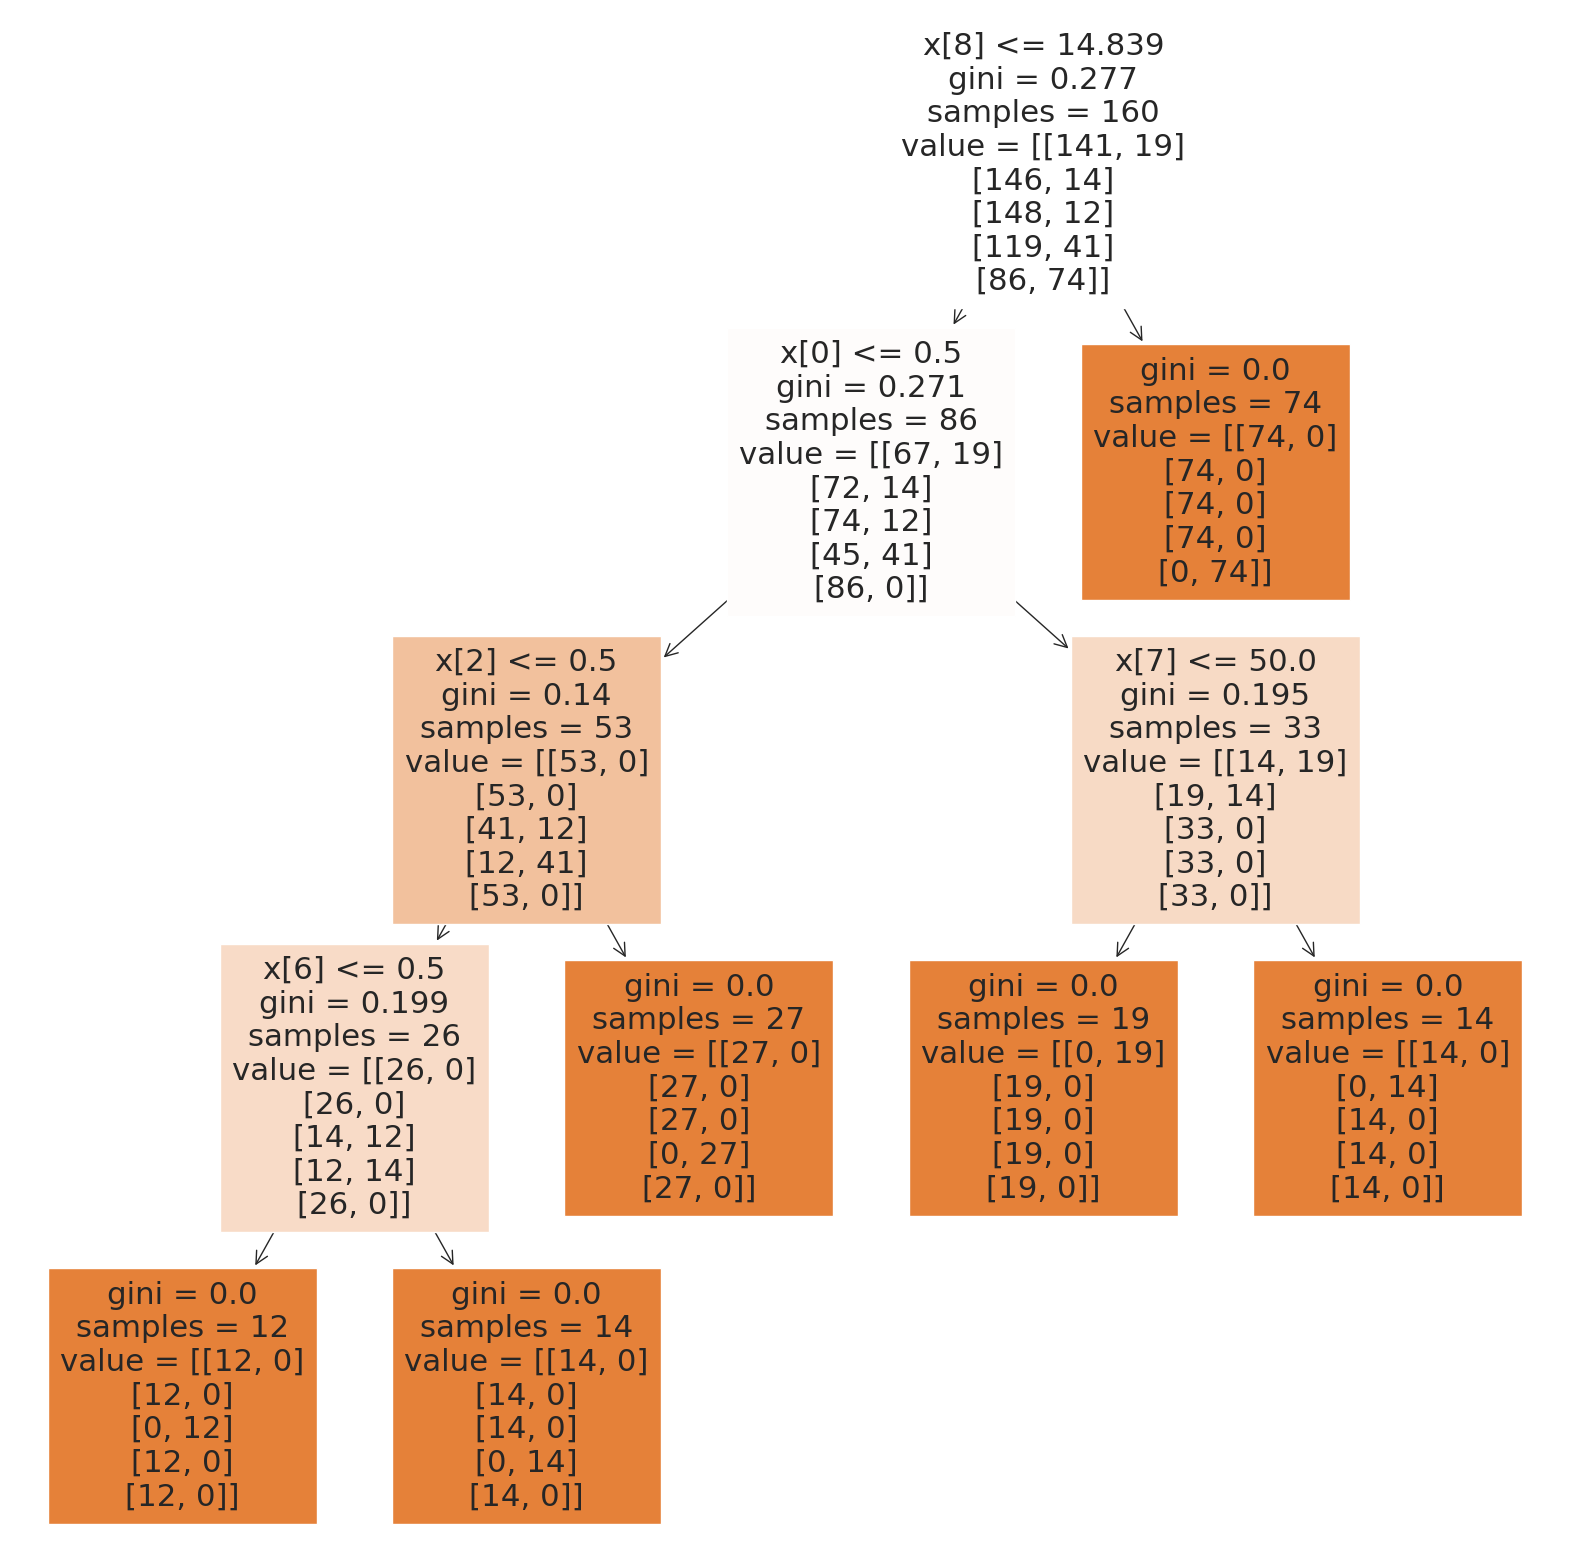

In [26]:
from sklearn import tree
plt.figure(figsize = (20,20))
tree.plot_tree(dtree,filled = True)